Random variable: A variable that represents the outcome of a random experiment. Has a range of possible values, each with a certain probability.

Two types of random variables: 
1. Discrete Random Variables 
2. Continous Random Variables

Parameters: In probability distributions are numerical values that determines the shape, location, abd scale of the distributions

Different probability distributions have different sets of parameters that detmerine their shape and characteristics, and understanding these parameters is essential in statistical analysis and inference.

Probability Distribution Functions: 

Is a list of all of the possible outcomes of a random variable along with its their corresponding probability values. 
or 

Probability distribution is a mathematical function that gives the probability of occurence of different possible outcome for a random variable. 

- PMF: Probability mass function (Discrete)
- PDF: Probability density function (Continous)
- CDF: Cumulative distribution function (Both)

PMF: 
* PMF stands for Probability Mass function. It is a mathematical function that describes the probability distribution of a discrete random variable. 
* THe PMF of a discrete random variable assigns a probability to each possible value of a random variable. the probability assigned by the PMF must satisfy two conditions: 
    - The probability assigned to each value mus be non-negative (i.e greater than or equal to zero)
    - The sum of the probabilities assigned to all possible values must equal to 1. 

In [2]:
import pandas as pd
import random

10000
[6, 9, 4, 10, 9]


<Axes: >

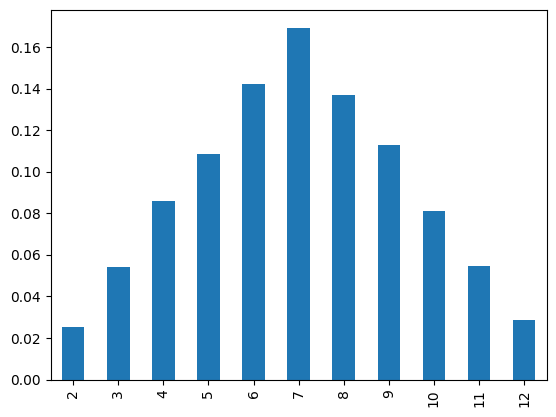

In [19]:
L= []
for i in range(10000): 
    a= random.randint(1,6)
    b= random.randint(1,6)
    L.append(a+b)

print(len(L))
print(L[:5])

x= pd.Series(L).value_counts(normalize=True).sort_index()
x.plot(kind= 'bar')

# we can see uniform distribution (confirm our theory.)
# two dice values sum, gives normal distribution with values between 2 to 12

Bernoulli Distribution

In [22]:
import numpy as np

# simulate 10 Bernoulli trials with p=0.3
samples = np.random.binomial(n=1, p=0.3, size=10)
print(samples)


[0 1 1 0 0 0 1 0 0 0]


In [23]:
np.mean(samples)   # ≈ 0.3


np.float64(0.3)

In [24]:
import pandas as pd

# create 1000 Bernoulli samples with p=0.4
samples = np.random.binomial(1, 0.4, 1000)
df = pd.DataFrame({"Bernoulli": samples})

print(df["Bernoulli"].value_counts(normalize=True))


Bernoulli
0    0.592
1    0.408
Name: proportion, dtype: float64


<Axes: title={'center': 'Bernoulli Distribution'}, xlabel='Bernoulli'>

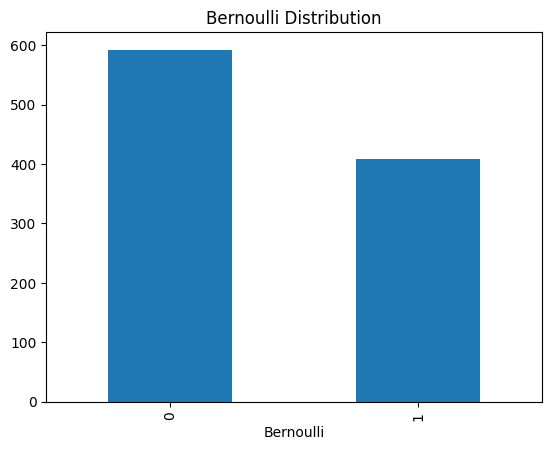

In [25]:
df["Bernoulli"].value_counts().plot(kind="bar", title="Bernoulli Distribution")


Binomial Distribution

In [39]:
import numpy as np

# simulate 10,000 experiments: 20 trials each, p=0.3
samples = np.random.binomial(n=20, p=0.3, size=10000)

print("Mean:", samples.mean())       # ≈ 20 * 0.3 = 6
print("Variance:", samples.var())    # ≈ 20 * 0.3 * 0.7 = 4.2


Mean: 6.0025
Variance: 4.16689375


In [40]:
import pandas as pd

df = pd.DataFrame({"binom": samples})
print(df["binom"].value_counts().sort_index())


binom
0        6
1       54
2      291
3      729
4     1291
5     1782
6     1927
7     1614
8     1184
9      642
10     318
11     123
12      29
13       7
15       2
16       1
Name: count, dtype: int64


<Axes: title={'center': 'Binomial Distribution'}, xlabel='binom'>

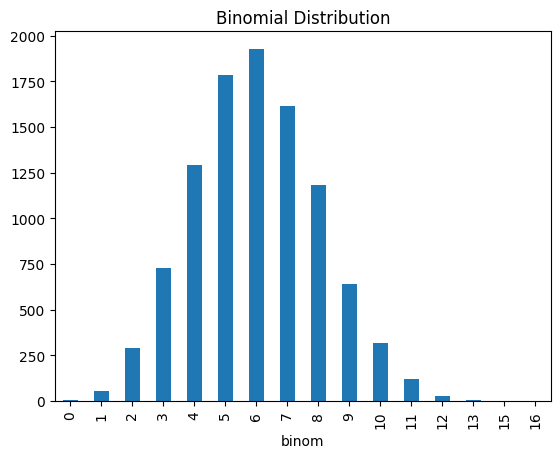

In [42]:
df["binom"].value_counts().sort_index().plot(kind="bar", title="Binomial Distribution")

In [ ]:
# To get value:
 
from scipy.stats import binom

# Example: n=20 trials, p=0.3, probability of exactly k=5 successes
prob = binom.pmf(k=5, n=20, p=0.3)
print(prob)
binom.cdf(k=5, n=20, p=0.3)   # P(X ≤ 5)
1 - binom.cdf(k=5, n=20, p=0.3)   # P(X > 5)


0.17886305056987964


np.float64(0.5836291705525192)

### Parametric Density Estimation 

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

# normal distribution graph
sample= normal(loc= 50, scale= 5, size= 1000) # loc -> mean is 50, scale->std -> 5, number of values -> 1000

In [62]:
sample.mean()

np.float64(50.105134258377724)

In [64]:
sample.std()

np.float64(5.107467451699329)

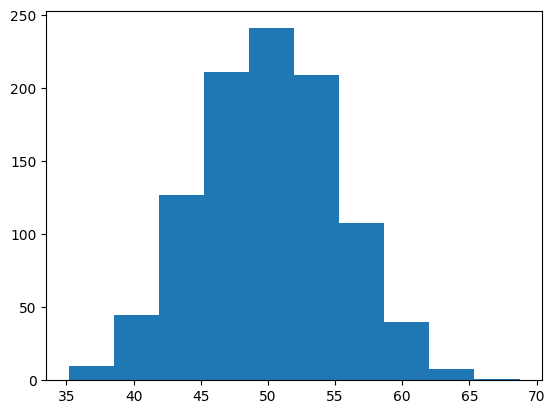

In [66]:
# plot histogram to understand the distribution of the data 

plt.hist(sample, bins= 10)
plt.show()

In [60]:
# calculate sample mean and sample std 
sample_mean= sample.mean()
sample_std= sample.std()

In [69]:
values= np.linspace(sample.min(), sample.max(), 100)

In [ ]:
# fit the distribution with above parameters 
from scipy.stats import norm 
dist= norm(sample_mean, sample_std)

In [71]:
probabilities= [dist.pdf(value) for value in values]

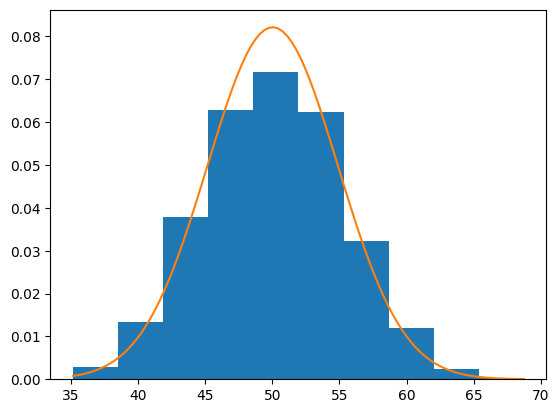

In [80]:
# plot the histogram and pdf 

plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)
plt.show()

Density Estimation

- Density Estimation: It is a statistical technique used to estimate the probability density function (pdf) of a random variable based on a set of observations or data. In simple terms, it involves estimating underlying distribution of a set of data points. 

- Density estimation cna be used for a variety of purposes, such as hypothesis testing, data anlysis and data visualization. It is particularly useful in areas such as machine learning, where it is often used to estimate the probability distribution of input data or to model the likelihood of certain events or outcomes. 

Two type of density estimation: 
1. Parametric: Parametric density estimation is a statistical technique used to estimate the probability distribution of a dataset by assuming that the data follows a specific distribution with a set of parameters. We use use MLE (Maximum likelihood estimation [computationaly expensive]) or Log likelihood estimation [same answer but less expensive as we can apply log property i.e: log(ab)= log(a)+ log(b)] to get values of parameters need to defined assumed distributions. 
2. Non-parametric: Non-parametric density estimation is a statistical technique used to estimate the probability distribution of a dataset. One of th most common non-parametric approach is Kernel Density Estimation. 

Problems with probability distribution estimation:
    Probability distribution estimations relies on finding the best pdf and determing its parameters accurately. But the random sample that we consider is very small. Hence it becomes very difficult to determine what parameters and what probability distribution function to use. To takle this problem, Maximum likelihood Estimation is used. 

Q: What is maximum likelihood estimation? 

A: MLE is method of determining the parameters (mean, std etc.) of normally distributed random sample data or finding probability density function over the random sample data. Tihs is done by maximizing the likelihood function so that pdf is fitted over the random sample. Another way to look at it is the MLE function, it gives the mean, the std of the random sample that is most similar to that of the whole sample. 